In [1]:
import pandas as pd
import csv
# import warnings
# warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/Users/sonalichaudhari/Desktop/Churning/Data/Data_for_models.csv")

print("Churned customer     : ", data[data['Churn']==1].shape[0])
print("Non-Churned customer : ",data[data['Churn']==0].shape[0])

Churned customer     :  1869
Non-Churned customer :  5163


In [3]:
target = ['Churn']
id_col = ['customerID']

cols = [i for i in data.columns if i not in id_col + target ]

#dataframe with non negative values
X = data[cols].values
y = data[target].values

In [4]:
#Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,np.ravel(y),stratify= y,test_size = 0.3, random_state = 0)

sc = StandardScaler()
# Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

### Sampling
Reference

https://www.kaggle.com/qianchao/smote-with-imbalance-data

https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2

A simple way to fix imbalanced data-sets is simply to balance them, either by oversampling instances of the minority class or undersampling instances of the majority class.

The most well known example of this is SMOTE, which actually creates new instances of the minority class by forming convex combinations of neighboring instances.

In [6]:
# Using SMOTE to split the imbalanced data
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=2)
X_train_smote, X_test_smote,y_train_smote,y_test_smote =train_test_split(X,np.ravel(y), test_size=0.3, random_state=0)
Train_X_smote, Train_y_smote = sm.fit_sample(X_train_smote,y_train_smote)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Logistic Regression

[[1404  145]
 [ 266  295]]

Accuracy: 0.8052132701421801
Precision: 0.6704545454545454
Recall: 0.5258467023172906


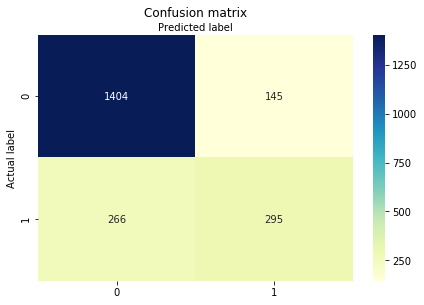

In [11]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[1149  406]
 [ 117  438]]

Accuracy: 0.752132701421801
Precision: 0.518957345971564
Recall: 0.7891891891891892


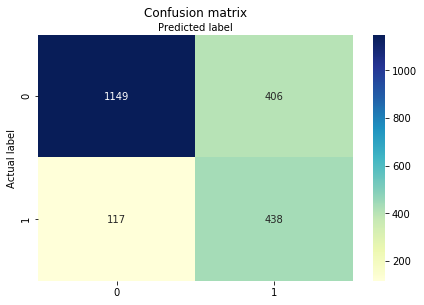

In [12]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(Train_X_smote,Train_y_smote)
y_pred=logreg.predict(X_test_smote)
confusion = metrics.confusion_matrix(y_test_smote, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nAccuracy:",metrics.accuracy_score(y_test_smote, y_pred))
print("Precision:",metrics.precision_score(y_test_smote, y_pred))
print("Recall:",metrics.recall_score(y_test_smote, y_pred))

#Cross validation

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

model = logreg
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

df = np.array(X_train)
y = np.array(y_train)

In [13]:
C_param_range = [0.001,0.01,0.1,1,10,100]
j=0
for i in C_param_range:
    print(i)
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(Train_X_smote,Train_y_smote)
    y_pred = lr.predict(X_test_smote)
    print("\nAccuracy:",metrics.accuracy_score(y_test_smote,y_pred))

0.001

Accuracy: 0.7341232227488151
0.01

Accuracy: 0.7535545023696683
0.1

Accuracy: 0.752132701421801
1

Accuracy: 0.752132701421801
10

Accuracy: 0.752132701421801
100

Accuracy: 0.752132701421801


# SVM

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(Train_X_smote, Train_y_smote)

y_pred = clf.predict(X_test_smote)

print("Accuracy:",metrics.accuracy_score(y_test_smote, y_pred))
print("Precision:",metrics.precision_score(y_test_smote, y_pred))
print("Recall:",metrics.recall_score(y_test_smote, y_pred))

In [19]:
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(Train_X_smote,Train_y_smote)
y_predict=svc.predict(X_test_smote)
print(metrics.accuracy_score(y_test_smote,y_predict))
confusion = metrics.confusion_matrix(y_test_smote, y_pred)
print(confusion)

0.7255924170616114
[[1265  290]
 [ 444  111]]


In [16]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

Accuracy Score:
0.795260663507109
[[1413  136]
 [ 296  265]]


# ANN

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, np.ravel(y_train), batch_size = 10, epochs = 100)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Using TensorFlow backend.


Epoch 1/100
4922/4922 [==============================] - 1s 250us/step - loss: 0.5085 - acc: 0.7343
Epoch 2/100
4922/4922 [==============================] - 1s 153us/step - loss: 0.4402 - acc: 0.7424
Epoch 3/100
4922/4922 [==============================] - 1s 153us/step - loss: 0.4332 - acc: 0.7962
Epoch 4/100
4922/4922 [==============================] - 1s 154us/step - loss: 0.4293 - acc: 0.7989
Epoch 5/100
4922/4922 [==============================] - 1s 153us/step - loss: 0.4259 - acc: 0.8015
Epoch 6/100
4922/4922 [==============================] - 1s 153us/step - loss: 0.4235 - acc: 0.8046
Epoch 7/100
4922/4922 [==============================] - 1s 147us/step - loss: 0.4217 - acc: 0.8072
Epoch 8/100
4922/4922 [==============================] - 1s 158us/step - loss: 0.4195 - acc: 0.8070
Epoch 9/100
4922/4922 [==============================] - 1s 138us/step - loss: 0.4180 - acc: 0.8074
Epoch 10/100
4922/4922 [==============================] - 1s 153us/step - loss: 0.4167 - acc: 0.8080

4922/4922 [==============================] - 1s 152us/step - loss: 0.4004 - acc: 0.8104
Epoch 83/100
4922/4922 [==============================] - 1s 138us/step - loss: 0.4004 - acc: 0.8117
Epoch 84/100
4922/4922 [==============================] - 1s 150us/step - loss: 0.3996 - acc: 0.8117
Epoch 85/100
4922/4922 [==============================] - 1s 151us/step - loss: 0.3995 - acc: 0.8102
Epoch 86/100
4922/4922 [==============================] - 1s 151us/step - loss: 0.3995 - acc: 0.8125
Epoch 87/100
4922/4922 [==============================] - 1s 152us/step - loss: 0.3989 - acc: 0.8123
Epoch 88/100
4922/4922 [==============================] - 1s 142us/step - loss: 0.3998 - acc: 0.8108
Epoch 89/100
4922/4922 [==============================] - 1s 151us/step - loss: 0.3997 - acc: 0.8145
Epoch 90/100
4922/4922 [==============================] - 1s 146us/step - loss: 0.3991 - acc: 0.8113
Epoch 91/100
4922/4922 [==============================] - 1s 147us/step - loss: 0.3997 - acc: 0.8100
Epo

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))